In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde

from plato.stars import classify_stars
from plato.visualisation import FigureProcessor, set_plot_defaults

In [28]:
field = "all_sky"

In [29]:
set_plot_defaults()

figure_directory = f"../figures/04_stellar_sample/{field}"
save = False

In [30]:
data = pd.read_csv(f"../data/processed/{field}_targets.csv", low_memory=False)

# filter for FGK stars and remove 0 mass or radius
data = data[data["Stellar Type"] == "FGK"]
data = data[(data["Radius"] > 0) & (data["Mass"] > 0)]

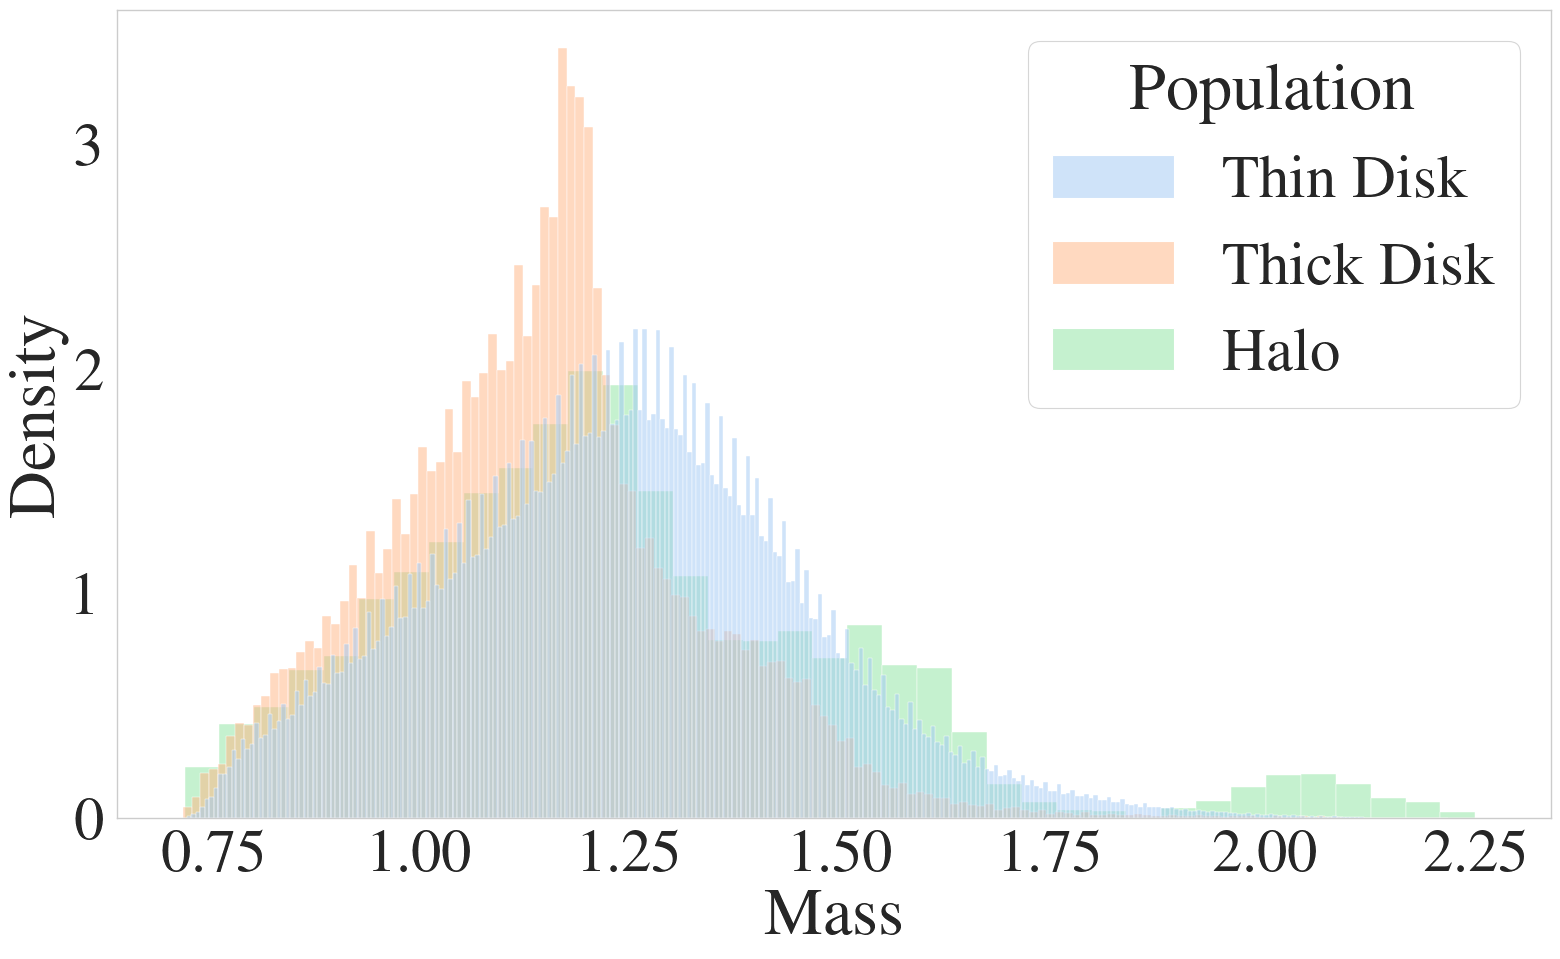

In [56]:
mass_histogram = sns.histplot(
    data=data,
    x="Mass",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
    stat="density",
    common_norm=False,
    common_bins=False,
)

FigureProcessor(mass_histogram).save(
    f"histogram_masses.pdf",
    figure_directory=figure_directory,
    save=save,
)

<Axes: xlabel='Radius', ylabel='Density'>

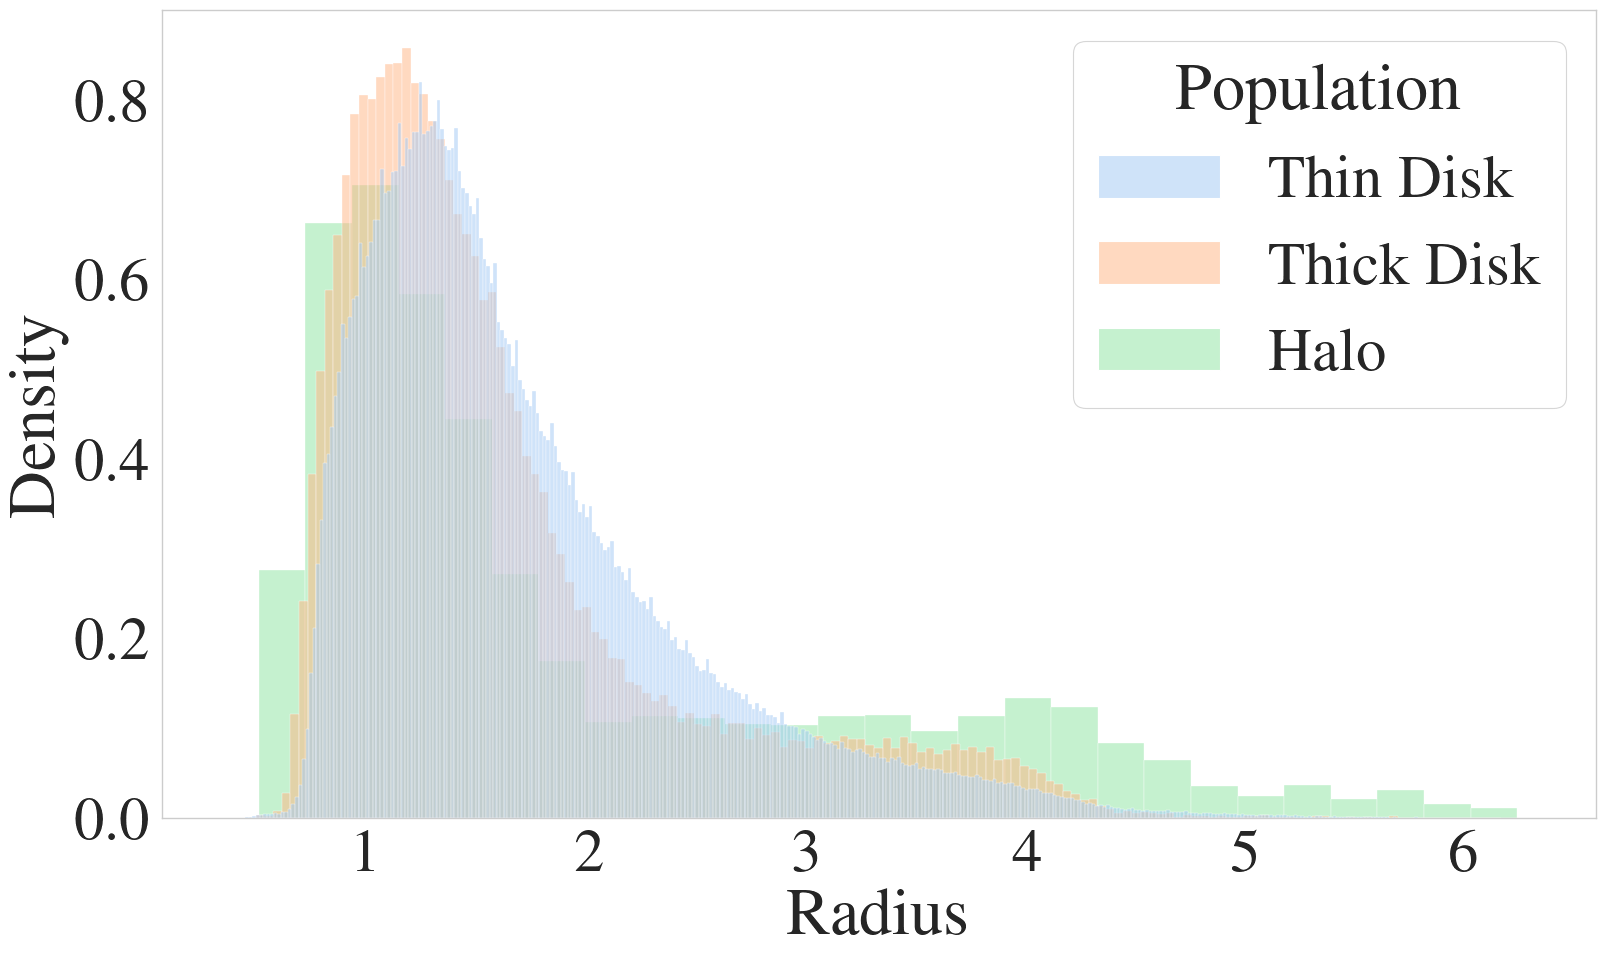

In [57]:
sns.histplot(
    data=data,
    x="Radius",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
    stat="density",
    common_norm=False,
    common_bins=False,
)

<Axes: xlabel='gaiaV', ylabel='Density'>

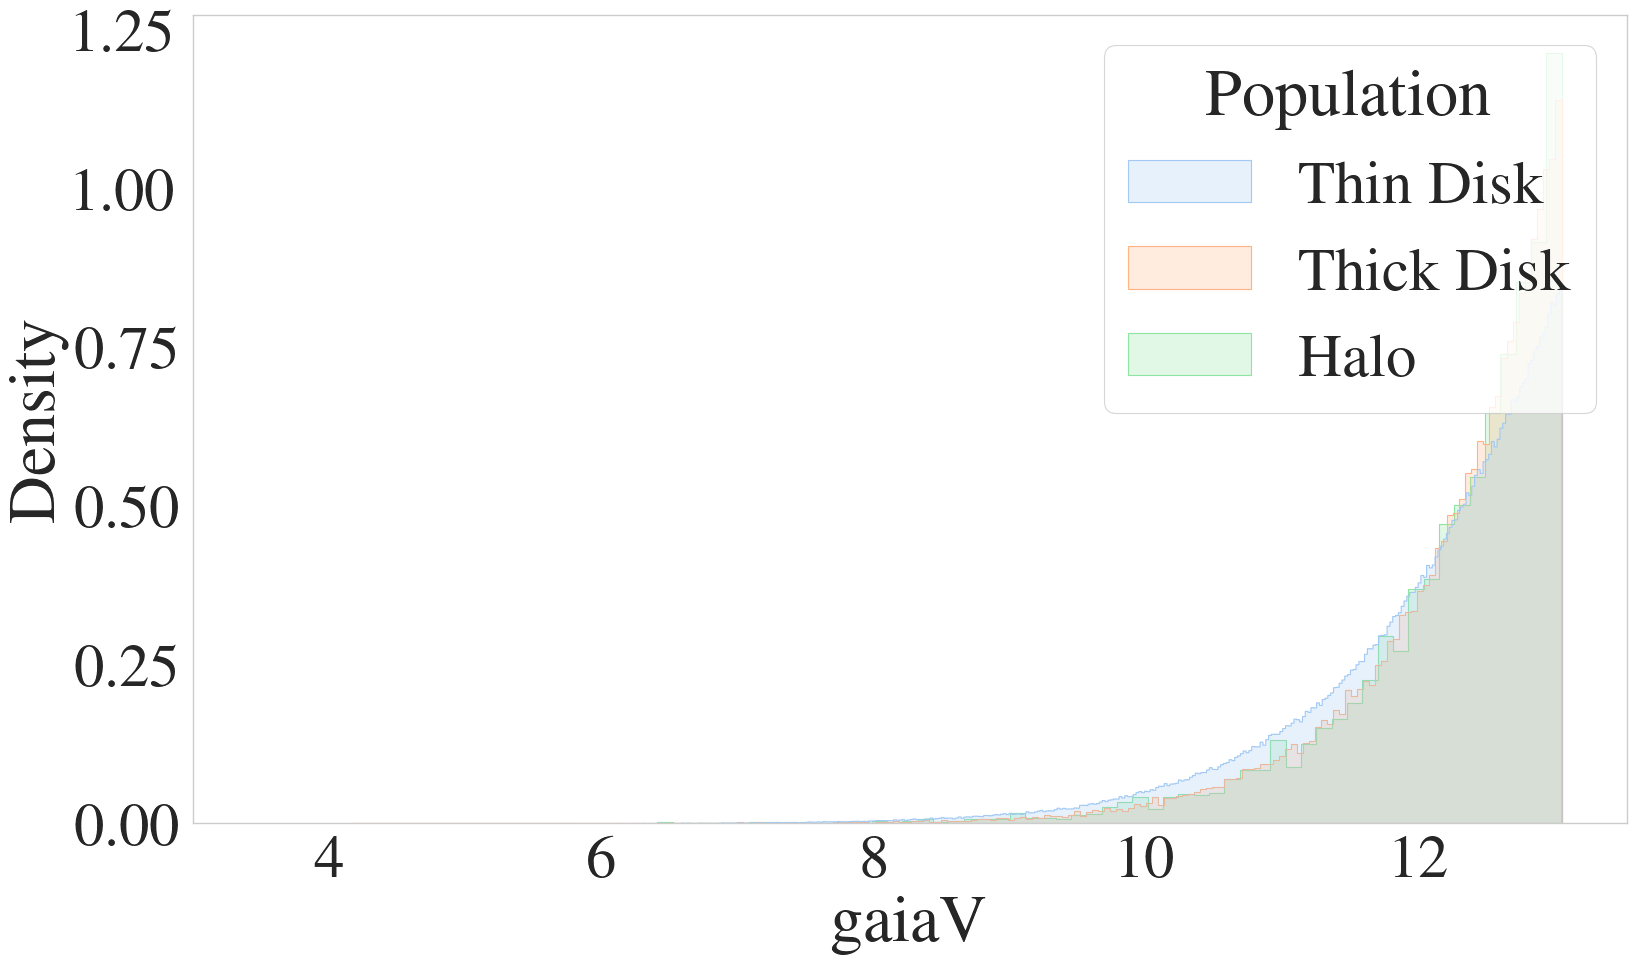

In [58]:
sns.histplot(
    data=data,
    x="gaiaV",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
    stat="density",
    common_norm=False,
    element="step",
    common_bins=False,
)

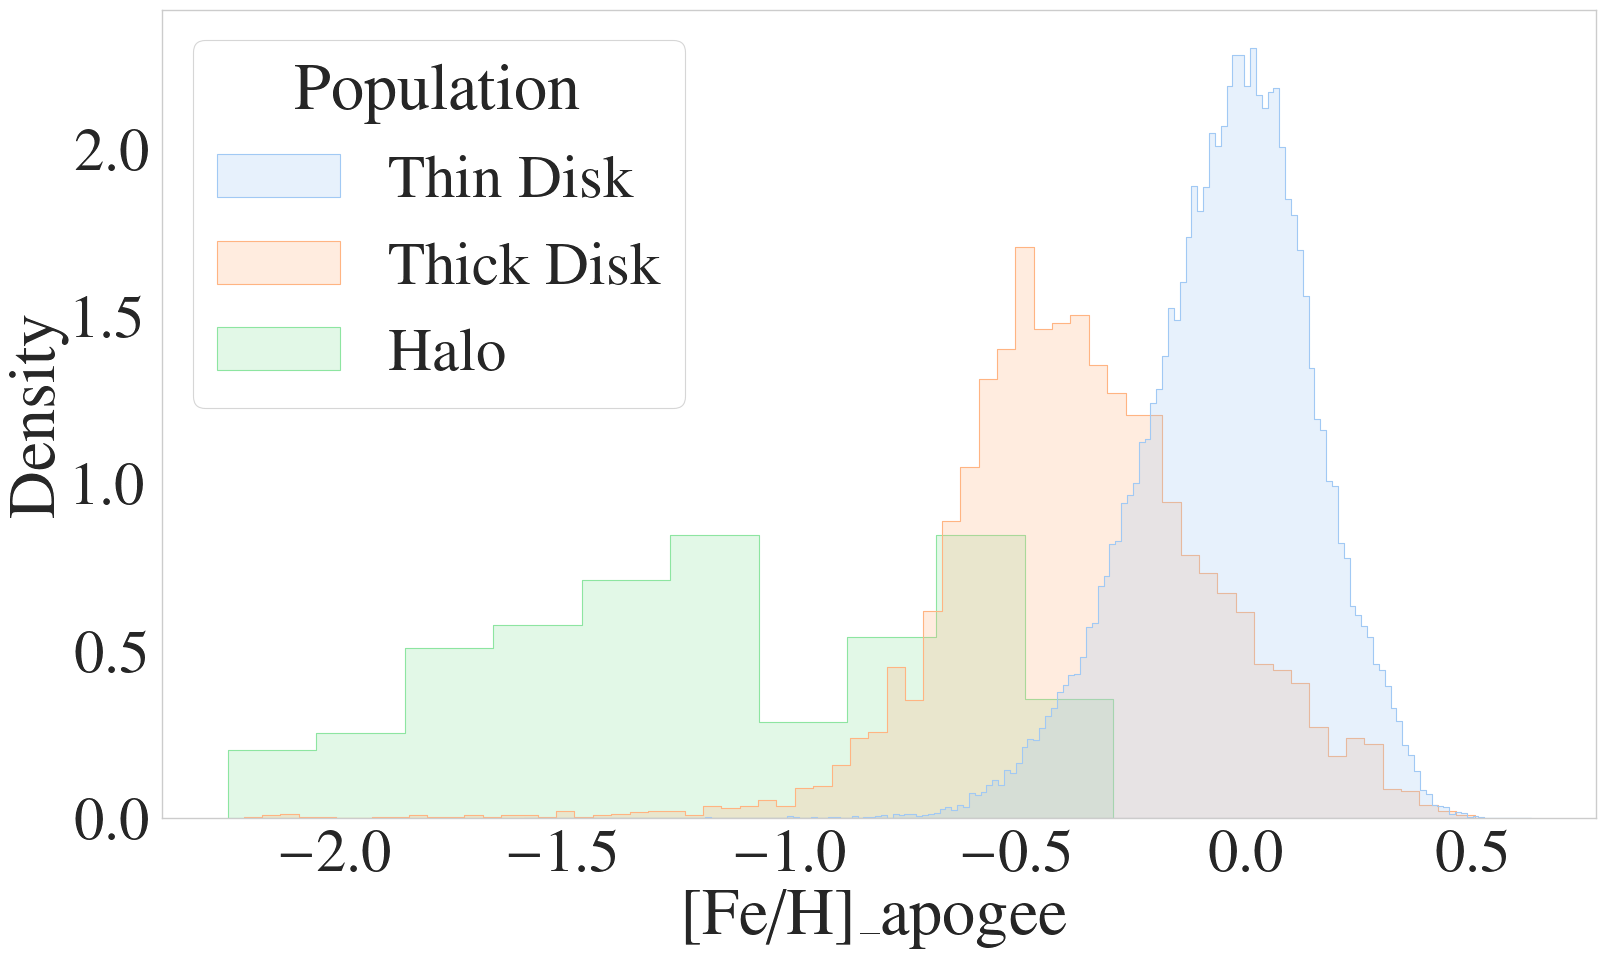

In [55]:
ax = sns.histplot(
    data=data,
    x="[Fe/H]_apogee",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
    stat="density",
    common_norm=False,
    element="step",
    common_bins=False,
)
sns.move_legend(ax, "upper left")

In [35]:
# group by population and calculate mean and std of [Fe/H]
feh_stats = data.groupby("Population")["[Fe/H]"].agg(["mean", "median", "std"])
print(feh_stats)

                          mean  median       std
Population                                      
Halo                 -1.481212 -1.3100  1.087196
Halo Candidate       -1.114295 -0.8027  0.977896
Thick Disk           -0.396864 -0.3100  0.591627
Thick Disk Candidate -0.114794 -0.0800  0.389822
Thin Disk            -0.119057 -0.0900  0.382939


<Axes: xlabel='[alpha/M]_apogee', ylabel='Density'>

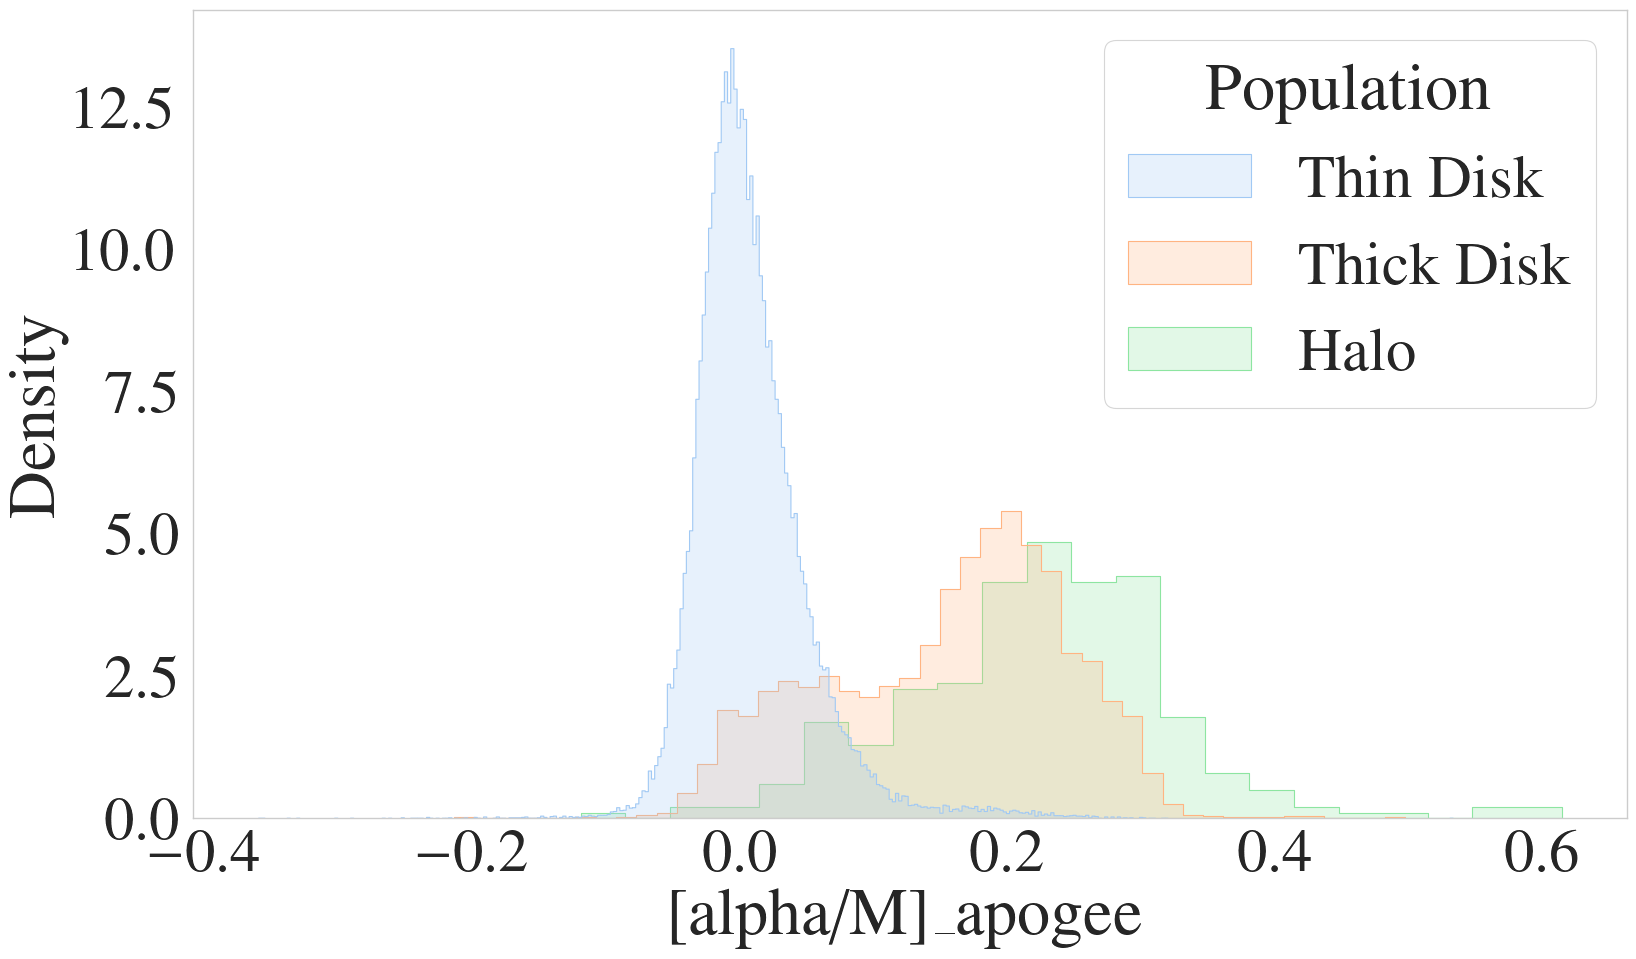

In [87]:
# histplot alpha/Fe
sns.histplot(
    data=data,
    x="[alpha/M]_apogee",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
    stat="density",
    common_norm=False,
    element="step",
    common_bins=False,
)

In [37]:
# group by population and calculate mean and std of [Fe/H]
feh_stats = data.groupby("Population")["[alpha/Fe]"].agg(["mean", "median", "std"])
print(feh_stats)

                          mean  median       std
Population                                      
Halo                  0.313453    0.31  0.269322
Halo Candidate        0.290348    0.28  0.214469
Thick Disk            0.171583    0.15  0.192977
Thick Disk Candidate  0.100867    0.08  0.171485
Thin Disk             0.142445    0.12  0.183214


<Axes: xlabel='[Fe/H]_apogee', ylabel='[alpha/M]_apogee'>

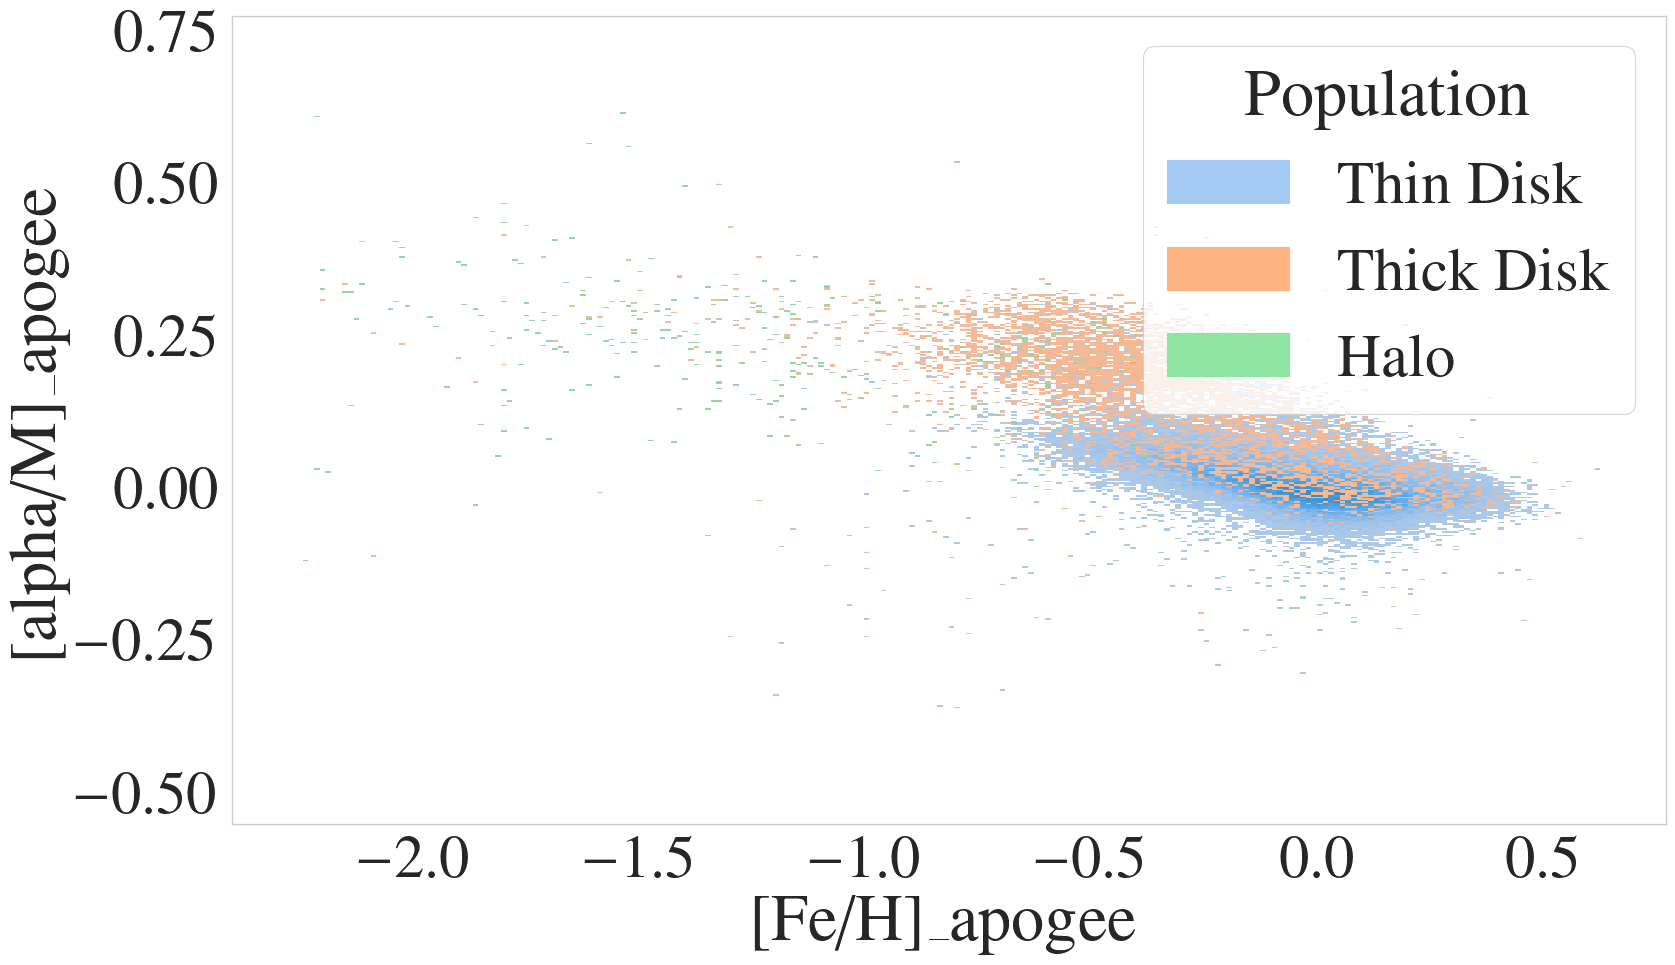

In [60]:
# plot alpha vs [Fe/H] as histogram
sns.histplot(
    data=data,
    x="[Fe/H]_apogee",
    y="[alpha/M]_apogee",
    stat="density",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
)

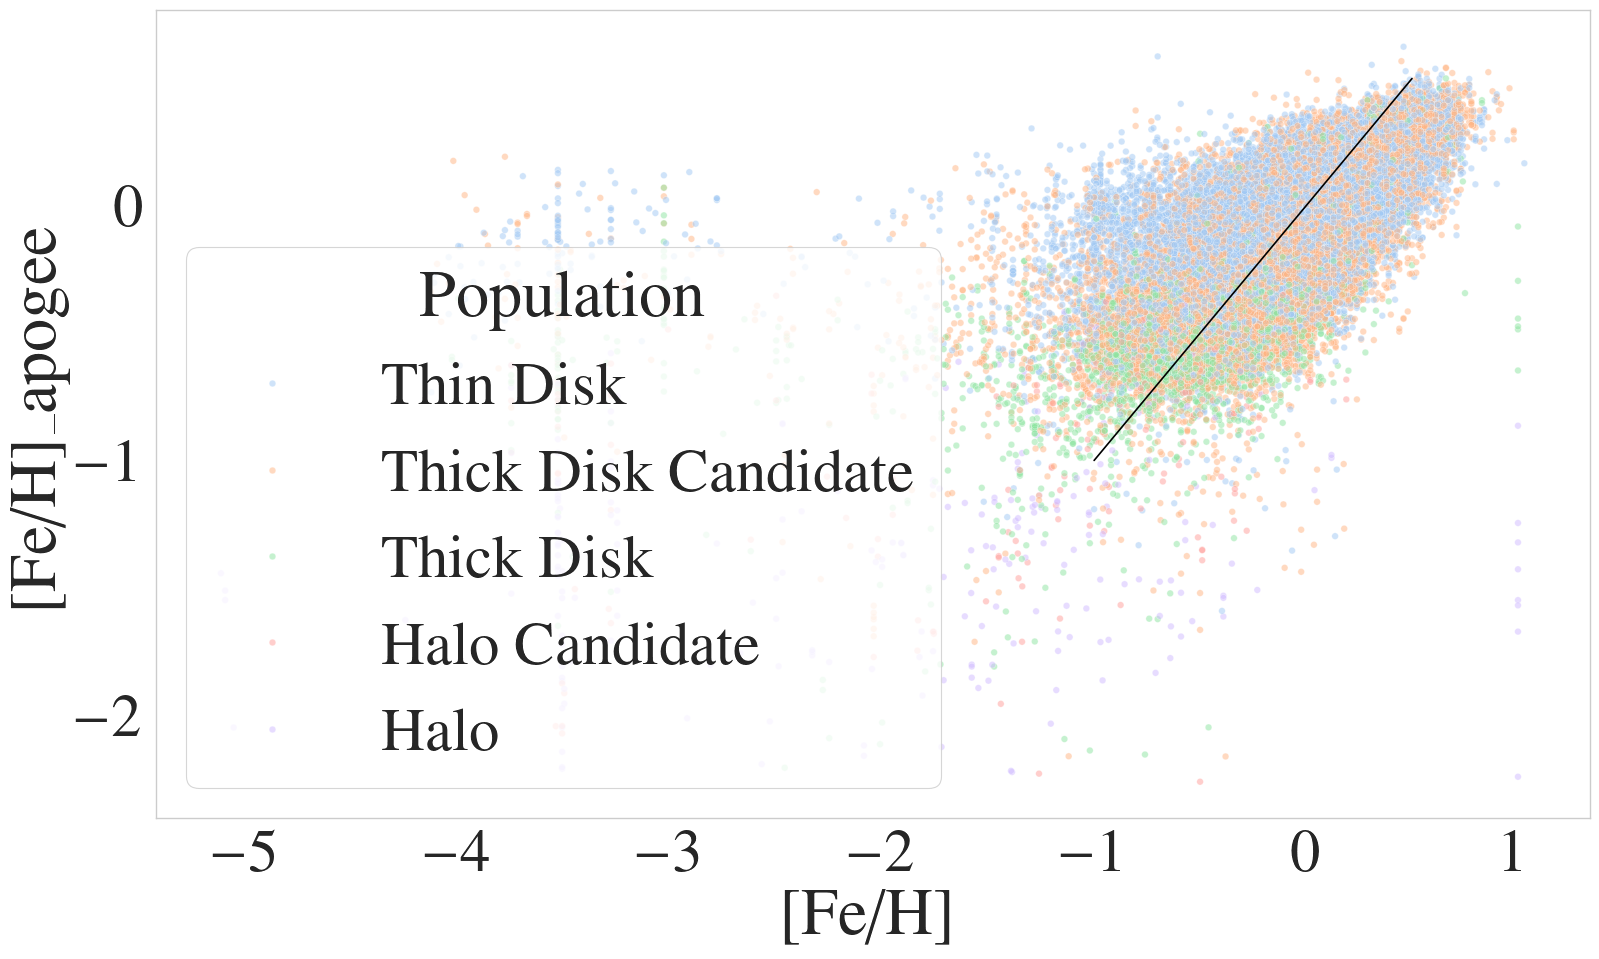

In [63]:
sns.scatterplot(
    data=data,
    x="[Fe/H]",
    y="[Fe/H]_apogee",
    hue="Population",
    alpha=0.5,
)
plt.plot([-1, 0.5], [-1, 0.5], color="black")

<Axes: xlabel='[Fe/H]_apogee', ylabel='[alpha/M]_apogee'>

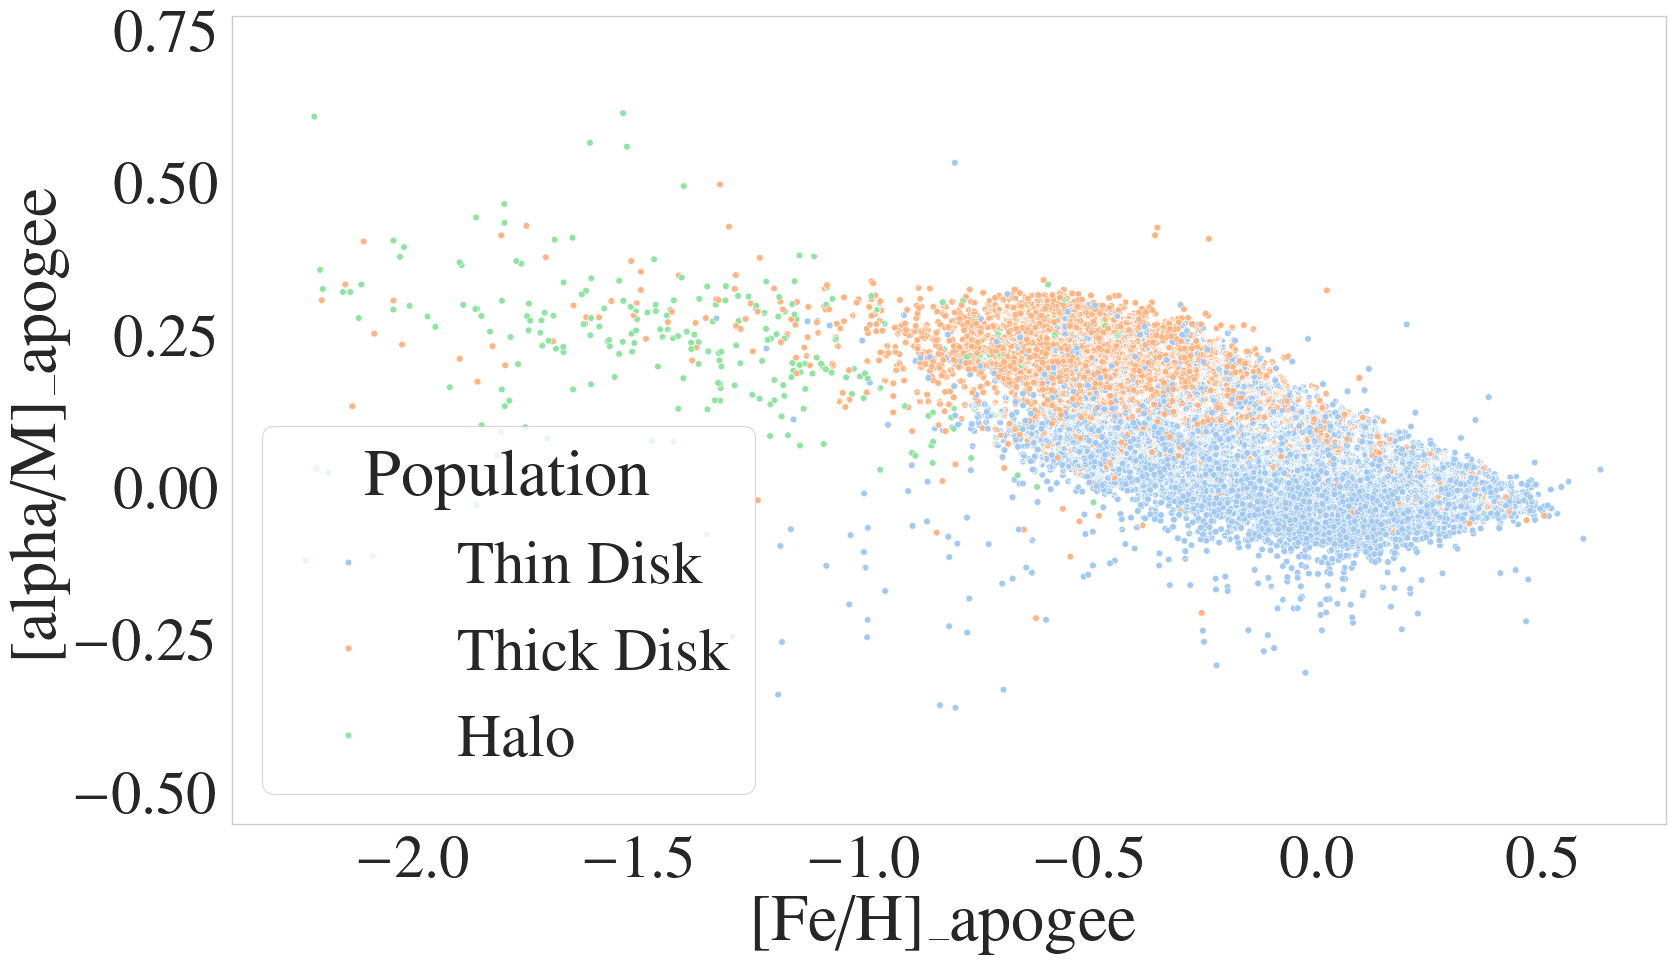

In [90]:
sns.scatterplot(
    data=data,
    x="[Fe/H]_apogee",
    y="[alpha/M]_apogee",
    hue="Population",
    hue_order=["Thin Disk", "Thick Disk", "Halo"],
)